In [1]:
import pandas as pd
import numpy as np
#so like now print the data ig
df = pd.read_csv('API_SP.DYN.LE00.IN_DS2_en_csv_v2_132.csv', skiprows=4)
print(f"Shape: {df.shape}")  
print("\nFirst 5 rows:")
print(df.head())

Shape: (266, 70)

First 5 rows:
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                            Indicator Name  Indicator Code       1960  \
0  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  64.049000   
1  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  44.169658   
2  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  32.799000   
3  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  37.779636   
4  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  37.933000   

        1961       1962       1963       1964       1965  ...       2016  \
0  64.215000  64.602000  64.944000  65.303000  65.615000  ...  75.540000   
1  44.468838  44.877890  45.160583  45.535695  45.770723  ...  62.167981   
2  33.291000  33.7

In [2]:
#data im dealing w 

print("Column names:\n")
print(df.columns.tolist()[:10]) 
print("\n")
print("Data types:\n")
print(df.dtypes.head(10))
print("\n")
print("First few rows of actual data:\n")
print(df[['Country Name', 'Country Code', '1960', '1961', '1962']].head())

Column names:

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965']


Data types:

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
dtype: object


First few rows of actual data:

                  Country Name Country Code       1960       1961       1962
0                        Aruba          ABW  64.049000  64.215000  64.602000
1  Africa Eastern and Southern          AFE  44.169658  44.468838  44.877890
2                  Afghanistan          AFG  32.799000  33.291000  33.757000
3   Africa Western and Central          AFW  37.779636  38.058956  38.681792
4                       Angola          AGO  37.933000  36.902000  37.168000


In [3]:
# fidning hk among all the countries 

hk_options = df[df['Country Name'].str.contains('Hong', na=False)]['Country Name'].unique()
print(f"Possible matches: {hk_options}")

if len(hk_options) > 0:
    hk_name = hk_options[0]
    print(f"\nUsing: {hk_name}")
    hk_data = df[df['Country Name'] == hk_name]
    print(f"\nHong Kong data shape: {hk_data.shape}")
    print(hk_data.head())
else:
    print("Hong Kong not found. All Countries.")
    print(df['Country Name'].head(30))

Possible matches: ['Hong Kong SAR, China']

Using: Hong Kong SAR, China

Hong Kong data shape: (1, 70)
            Country Name Country Code  \
96  Hong Kong SAR, China          HKG   

                             Indicator Name  Indicator Code       1960  \
96  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  65.697122   

         1961       1962       1963       1964       1965  ...       2016  \
96  66.441659  66.910463  67.645171  68.219098  68.866805  ...  84.211463   

        2017       2018       2019       2020       2021       2022  \
96  84.69561  84.869756  85.155854  85.496341  85.532683  83.660976   

         2023  2024  Unnamed: 69  
96  85.247317   NaN          NaN  

[1 rows x 70 columns]


In [4]:
#all imp data of the hk

pd.set_option('display.max_columns', None)
print(hk_data)


            Country Name Country Code  \
96  Hong Kong SAR, China          HKG   

                             Indicator Name  Indicator Code       1960  \
96  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  65.697122   

         1961       1962       1963       1964       1965       1966  \
96  66.441659  66.910463  67.645171  68.219098  68.866805  69.265854   

         1967       1968       1969       1970       1971       1972  \
96  69.827854  70.217024  70.627171  70.934683  71.468049  71.450976   

         1973       1974       1975       1976       1977       1978  \
96  72.090244  72.597805  73.362195  72.789024  73.349268  73.540732   

         1979       1980       1981       1982       1983       1984  \
96  73.663171  74.653415  75.349024  75.438537  75.286341  76.009512   

         1985      1986       1987       1988      1989       1990       1991  \
96  76.429268  76.68439  76.897805  77.083415  77.02878  77.370732  77.872927   

         1992       1993 

In [5]:
#transposing cuz apparently that's imp

hk_transposed = hk_data.T
pd.options.display.max_rows = 9999
print(hk_transposed)
print(hk_transposed.shape)

                                                     96
Country Name                       Hong Kong SAR, China
Country Code                                        HKG
Indicator Name  Life expectancy at birth, total (years)
Indicator Code                           SP.DYN.LE00.IN
1960                                          65.697122
1961                                          66.441659
1962                                          66.910463
1963                                          67.645171
1964                                          68.219098
1965                                          68.866805
1966                                          69.265854
1967                                          69.827854
1968                                          70.217024
1969                                          70.627171
1970                                          70.934683
1971                                          71.468049
1972                                          71

In [6]:
#starting some teeny meenie cleanie

hk_years = hk_transposed[4:]
df = pd.DataFrame(hk_years)
n=2
df.drop(df.tail(n).index, inplace = True)
print(df)

             96
1960  65.697122
1961  66.441659
1962  66.910463
1963  67.645171
1964  68.219098
1965  68.866805
1966  69.265854
1967  69.827854
1968  70.217024
1969  70.627171
1970  70.934683
1971  71.468049
1972  71.450976
1973  72.090244
1974  72.597805
1975  73.362195
1976  72.789024
1977  73.349268
1978  73.540732
1979  73.663171
1980  74.653415
1981  75.349024
1982  75.438537
1983  75.286341
1984  76.009512
1985  76.429268
1986   76.68439
1987  76.897805
1988  77.083415
1989   77.02878
1990  77.370732
1991  77.872927
1992  77.673415
1993  78.016098
1994  78.543659
1995   78.67878
1996  79.627561
1997  80.112195
1998  80.106829
1999  80.372683
2000  80.873171
2001  81.419268
2002  81.452195
2003  81.343415
2004  81.799268
2005  81.609024
2006  82.384878
2007  82.366829
2008  82.340488
2009  82.775122
2010  82.957561
2011  83.411951
2012  83.450244
2013   83.83122
2014   83.93561
2015  84.252683
2016  84.211463
2017   84.69561
2018  84.869756
2019  85.155854
2020  85.496341
2021  85

In [7]:
# no missing values so cleanie beanie

hk_clean = df.copy()
hk_clean.columns = ['Life Expectancy']
hk_clean.index = pd.to_datetime(hk_clean.index, format='%Y')
print(hk_clean)
print("\n")
print("As we have clean data so now:")
print(f"Shape: {hk_clean.shape}")
print(f"Time range: {hk_clean.index.min().year} to {hk_clean.index.max().year}")
print(f"Number of years: {len(hk_clean)}")
print("\nBasic statistics:")
print(hk_clean['Life Expectancy'].describe())

           Life Expectancy
1960-01-01       65.697122
1961-01-01       66.441659
1962-01-01       66.910463
1963-01-01       67.645171
1964-01-01       68.219098
1965-01-01       68.866805
1966-01-01       69.265854
1967-01-01       69.827854
1968-01-01       70.217024
1969-01-01       70.627171
1970-01-01       70.934683
1971-01-01       71.468049
1972-01-01       71.450976
1973-01-01       72.090244
1974-01-01       72.597805
1975-01-01       73.362195
1976-01-01       72.789024
1977-01-01       73.349268
1978-01-01       73.540732
1979-01-01       73.663171
1980-01-01       74.653415
1981-01-01       75.349024
1982-01-01       75.438537
1983-01-01       75.286341
1984-01-01       76.009512
1985-01-01       76.429268
1986-01-01        76.68439
1987-01-01       76.897805
1988-01-01       77.083415
1989-01-01        77.02878
1990-01-01       77.370732
1991-01-01       77.872927
1992-01-01       77.673415
1993-01-01       78.016098
1994-01-01       78.543659
1995-01-01        78.67878
1

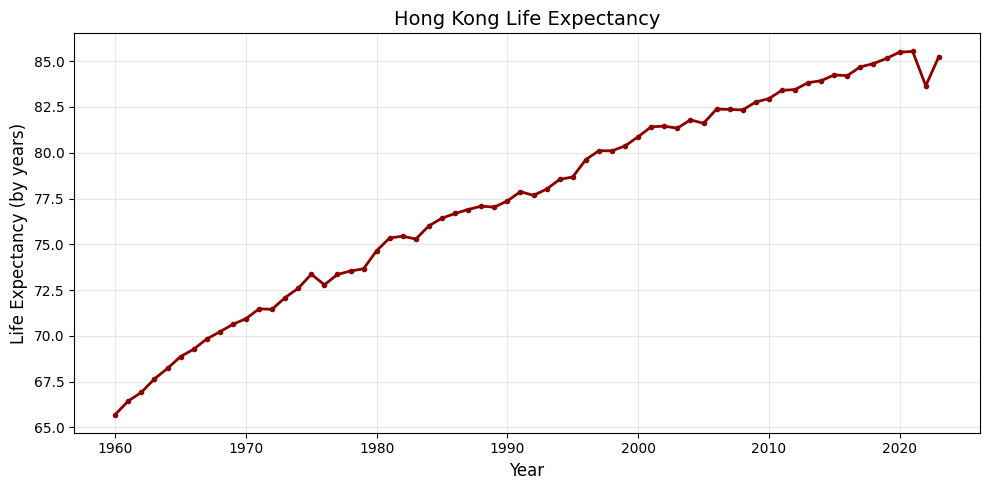

In [13]:
#plot now yippee (power went out im crashing)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(hk_clean.index, hk_clean['Life Expectancy'], 
         color='darkred', linewidth=2, marker='o', markersize=3)
plt.title('Hong Kong Life Expectancy', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (by years)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
hk_clean.to_csv('hong_kong_life_expectancy_clean.csv')
print("Saved clean data to: hong_kong_life_expectancy_clean.csv")
hk_clean[['Life Expectancy']].to_csv('hk_life_exp_clean_simple.csv')
print("Saved simple version to: hk_life_exp_clean_simple.csv")

Saved clean data to: hong_kong_life_expectancy_clean.csv
Saved simple version to: hk_life_exp_clean_simple.csv


In [10]:
#improvement in life expectancy seen

first_year = hk_clean.index.min().year
last_year = hk_clean.index.max().year
first_value = hk_clean.iloc[0, 0]
last_value = hk_clean.iloc[-1, 0]

total_improvement = last_value - first_value
print(f"\nTotal improvement ({first_year}-{last_year}): {total_improvement:.1f} years")

years_diff = last_year - first_year
avg_annual = total_improvement / years_diff
print(f"Average annual improvement: {avg_annual:.3f} years per year")


Total improvement (1960-2023): 19.6 years
Average annual improvement: 0.310 years per year


In [40]:
# so continuing from there, annual changes go brr

hk_clean['Annual Change'] = hk_clean['Life Expectancy'].diff()

print("Annual Changes Stats")
print("Largest increase:", hk_clean['Annual Change'].max())
print("Largest decrease:", hk_clean['Annual Change'].min())
print("Average annual change:", hk_clean['Annual Change'].mean())


Annual Changes Stats
Largest increase: 1.5863414634146125
Largest decrease: -1.8717073170732021
Average annual change: 0.31032055749128895


In [20]:
#can't use that n.lagrest so checking why

print("Data types:")
print(hk_clean.dtypes)

Data types:
Life Expectancy    object
Annual Change      object
dtype: object


In [21]:
print("First few values of Annual Change:")
print(hk_clean['Annual Change'].head())

First few values of Annual Change:
1960-01-01         NaN
1961-01-01    0.744537
1962-01-01    0.468805
1963-01-01    0.734707
1964-01-01    0.573927
Name: Annual Change, dtype: object


In [27]:
#changing both life expectancy and annual chagne to float instead of objects

hk_clean['Annual Change'] = pd.to_numeric(hk_clean['Life Expectancy'].diff(), errors='coerce')
hk_clean['Life Expectancy'] = pd.to_numeric(hk_clean['Life Expectancy'], errors='coerce')
print(f"Type: {hk_clean['Annual Change'].dtype}")
print(hk_clean[['Life Expectancy', 'Annual Change']].head())

Type: float64
            Life Expectancy  Annual Change
1960-01-01        65.697122            NaN
1961-01-01        66.441659       0.744537
1962-01-01        66.910463       0.468805
1963-01-01        67.645171       0.734707
1964-01-01        68.219098       0.573927


In [28]:
#so now

print("Data types:")
print(hk_clean.dtypes)

Data types:
Life Expectancy    float64
Annual Change      float64
dtype: object


In [29]:
print("\nTop 5 years with biggest improvements:")
print(hk_clean.nlargest(5, 'Annual Change')[['Life Expectancy', 'Annual Change']])


Top 5 years with biggest improvements:
            Life Expectancy  Annual Change
2023-01-01        85.247317       1.586341
1980-01-01        74.653415       0.990244
1996-01-01        79.627561       0.948780
2006-01-01        82.384878       0.775854
1975-01-01        73.362195       0.764390


In [30]:
#ooh boy gotta try projection now fu-

recent_years = 10
recent_data = hk_clean.iloc[-recent_years:]

print(recent_data)

            Life Expectancy  Annual Change
2014-01-01        83.935610       0.104390
2015-01-01        84.252683       0.317073
2016-01-01        84.211463      -0.041220
2017-01-01        84.695610       0.484146
2018-01-01        84.869756       0.174146
2019-01-01        85.155854       0.286098
2020-01-01        85.496341       0.340488
2021-01-01        85.532683       0.036341
2022-01-01        83.660976      -1.871707
2023-01-01        85.247317       1.586341


In [32]:
#wozzit called linear regression

years = np.array(range(recent_years))
values = recent_data['Life Expectancy'].values

#y=mx+c
m = (values[-1] - values[0]) / recent_years  
c = values[0]  

print (f"Gradient: {m}")
print("\n")
print(f"Intercept: {c}")


Gradient: 0.13117073170731003


Intercept: 83.9356097560976


In [43]:
#now then projections say

print("Simple Projections\n")

print(f"Trend (based on last {recent_years} years): Increasing by {m:.3f} years annually\n")

project_years = list(range(2024, 2034))
projections = []

for i, year in enumerate(project_years):
    years_ahead = year - 2023
    projected = last_value + (m * years_ahead)
    projections.append(projected)
    print(f"{year}: {projected:.1f} years")

print("\nDisclaimer: This is a VERY simple projection that doesn't take into account other possible factors like medical advances, lifestyle changes etc.")

Simple Projections

Trend (based on last 10 years): Increasing by 0.131 years annually

2024: 85.4 years
2025: 85.5 years
2026: 85.6 years
2027: 85.8 years
2028: 85.9 years
2029: 86.0 years
2030: 86.2 years
2031: 86.3 years
2032: 86.4 years
2033: 86.6 years

Disclaimer: This is a VERY simple projection that doesn't take into account other possible factors like medical advances, lifestyle changes etc.


In [44]:
projection_df = pd.DataFrame({
    'Year': project_years,
    'Projected Life Expectancy': projections
})

print(projection_df)

   Year  Projected Life Expectancy
0  2024                  85.378488
1  2025                  85.509659
2  2026                  85.640829
3  2027                  85.772000
4  2028                  85.903171
5  2029                  86.034341
6  2030                  86.165512
7  2031                  86.296683
8  2032                  86.427854
9  2033                  86.559024


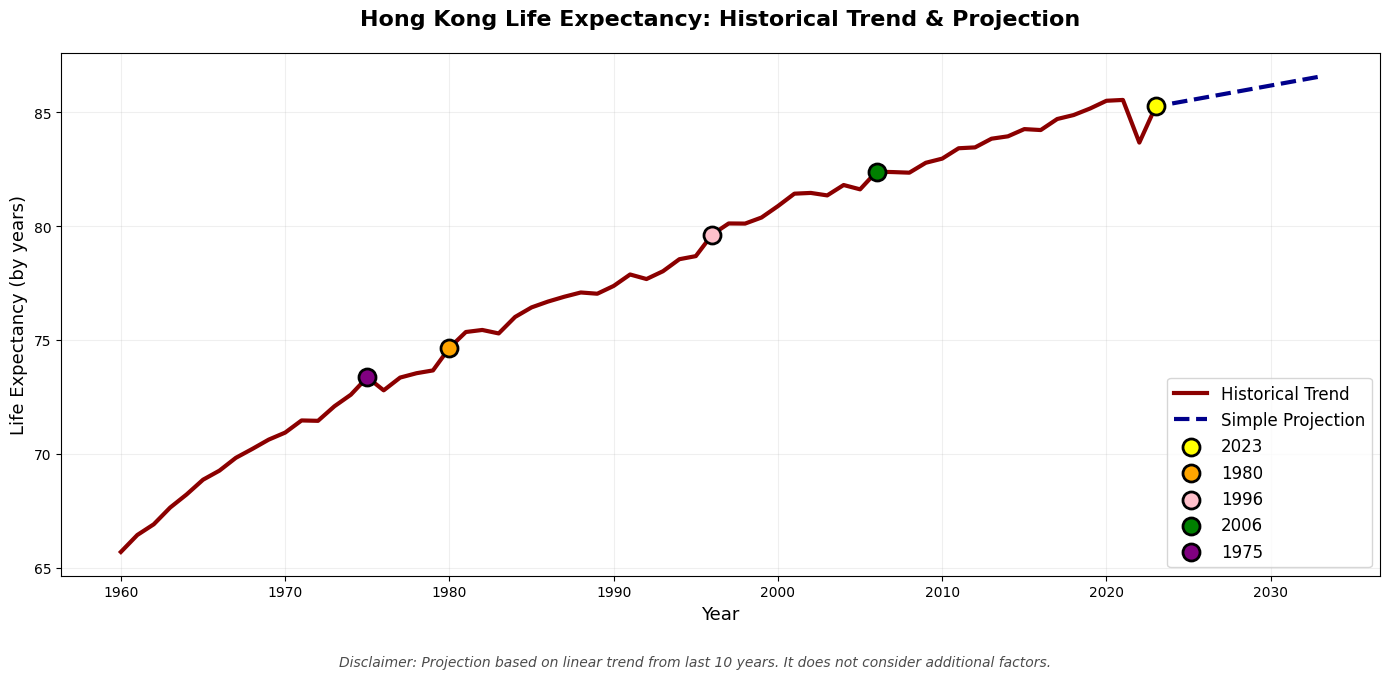

In [53]:
#make a plot and then i can write :D

plt.figure(figsize=(14, 7))

#main plot
plt.plot(hk_clean.index, hk_clean['Life Expectancy'], 
         color='darkred', linewidth=3, label='Historical Trend', zorder=3)

#main proj
proj_years = pd.to_datetime(projection_df['Year'], format='%Y')
plt.plot(proj_years, projection_df['Projected Life Expectancy'], 
         color='darkblue', linewidth=3, linestyle='--', label='Simple Projection', zorder=3)

#highlighting imp years
top_increases = hk_clean.nlargest(5, 'Annual Change')
highlight_years = [idx.year for idx in top_increases.index] 
colors = ['yellow', 'orange', 'pink', 'green', 'purple']

for year, color in zip(highlight_years, colors):
    year_str = str(year)
    if year_str in hk_clean.index.strftime('%Y'):
        value = hk_clean.loc[year_str, 'Life Expectancy']
        plt.scatter(pd.Timestamp(year_str), value, 
                   color=color, s=150, zorder=5, 
                   edgecolor='black', linewidth=2, label=f'{year}')
    
plt.title('Hong Kong Life Expectancy: Historical Trend & Projection', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Life Expectancy (by years)', fontsize=13)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, alpha=0.2)

# Add actuarial note
plt.figtext(0.5, 0.01, 
           'Disclaimer: Projection based on linear trend from last 10 years. It does not consider additional factors.',
           ha='center', fontsize=10, style='italic', alpha=0.7)

plt.tight_layout(rect=[0, 0.05, 1, 0.97]) 
plt.savefig('actuarial_life_expectancy_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
           